
# CODE TO Performance Prediction of Building Integrated Photovoltaic System Using Hybrid Deep Learning Algorithm

1 Manivannan Ragupathi, Department of Electrical and Electronics Engineering, St.Joseph's Institute of Technology, Chennai, 600119, Tamilnadu, India
&
2 Rengaraj Ramasubbu, Department of Electrical and Electronics Engineering, SSN College of Engineering, Chennai, 603110 Tamilnadu, India


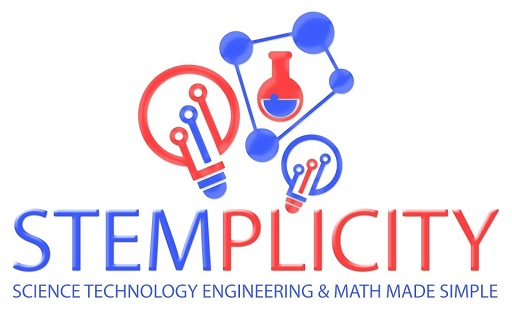

# PROBLEM STATEMENT

As the worlds population and economy expand, so does the worlds need for Power, driving up global energy consumption.The DL algorithm has recently been used to estimate the PV systems performance. Predicting PV power over many periods

following attributes: 

- Temperature
- Pressure
- RelativeHumidity
- WindSpeed
- Irradiance
- SOLAR(KWhr)
- WIND(KWhr)
- Time(Year,Month and Day)

The model should predict: 
- PowerGenerated

# STEP #0: LIBRARIES IMPORT


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# STEP #1: IMPORT DATASET

In [2]:
pvpower_df = pd.read_csv('Kanchipuram-Location.csv', encoding='ISO-8859-1')


In [3]:
pvpower_df

YEAR  MO  DY  HR  Irradiance  Temperature  Pressure  Relative Humidity  \
0      2020   1   1   5        0.00        23.55    100.71              93.38   
1      2020   1   1   6       36.37        24.35    100.83              92.00   
2      2020   1   1   7      141.98        25.67    100.94              87.81   
3      2020   1   1   8      288.37        26.72    101.02              84.25   
4      2020   1   1   9      364.91        27.78    101.02              78.94   
...     ...  ..  ..  ..         ...          ...       ...                ...   
17539  2022   1   1   0        0.00        24.12    100.99              92.12   
17540  2022   1   1   1        0.00        24.00    100.94              91.94   
17541  2022   1   1   2        0.00        23.83    100.90              91.81   
17542  2022   1   1   3        0.00        23.71    100.92              91.88   
17543  2022   1   1   4        0.00        23.62    100.96              92.00   

       Wind Speed  Column E X 50  SOLAR(KWhr)  WIND(KWhr)  S+W(KWhr)  
0            2.59            0.0      0.00000       0.518    0.51800  
1            2.74         1818.5      2.72775       0.548    3.27575  
2            3.57         7099.0     10.64850       0.714   11.36250  
3            3.92        14418.5     21.62775       0.784   22.41175  
4            4.34        18245.5     27.36825       0.868   28.23625  
...           ...            ...          ...         ...        ...  
17539        4.94            0.0      0.00000       0.988    0.98800  
17540        5.06            0.0      0.00000       1.012    1.01200  
17541        5.11            0.0      0.00000       1.022    1.02200  
17542        5.05            0.0      0.00000       1.010    1.01000  
17543        5.05            0.0      0.00000       1.010    1.01000  

[17544 rows x 13 columns]

# STEP #2: VISUALIZE DATASET

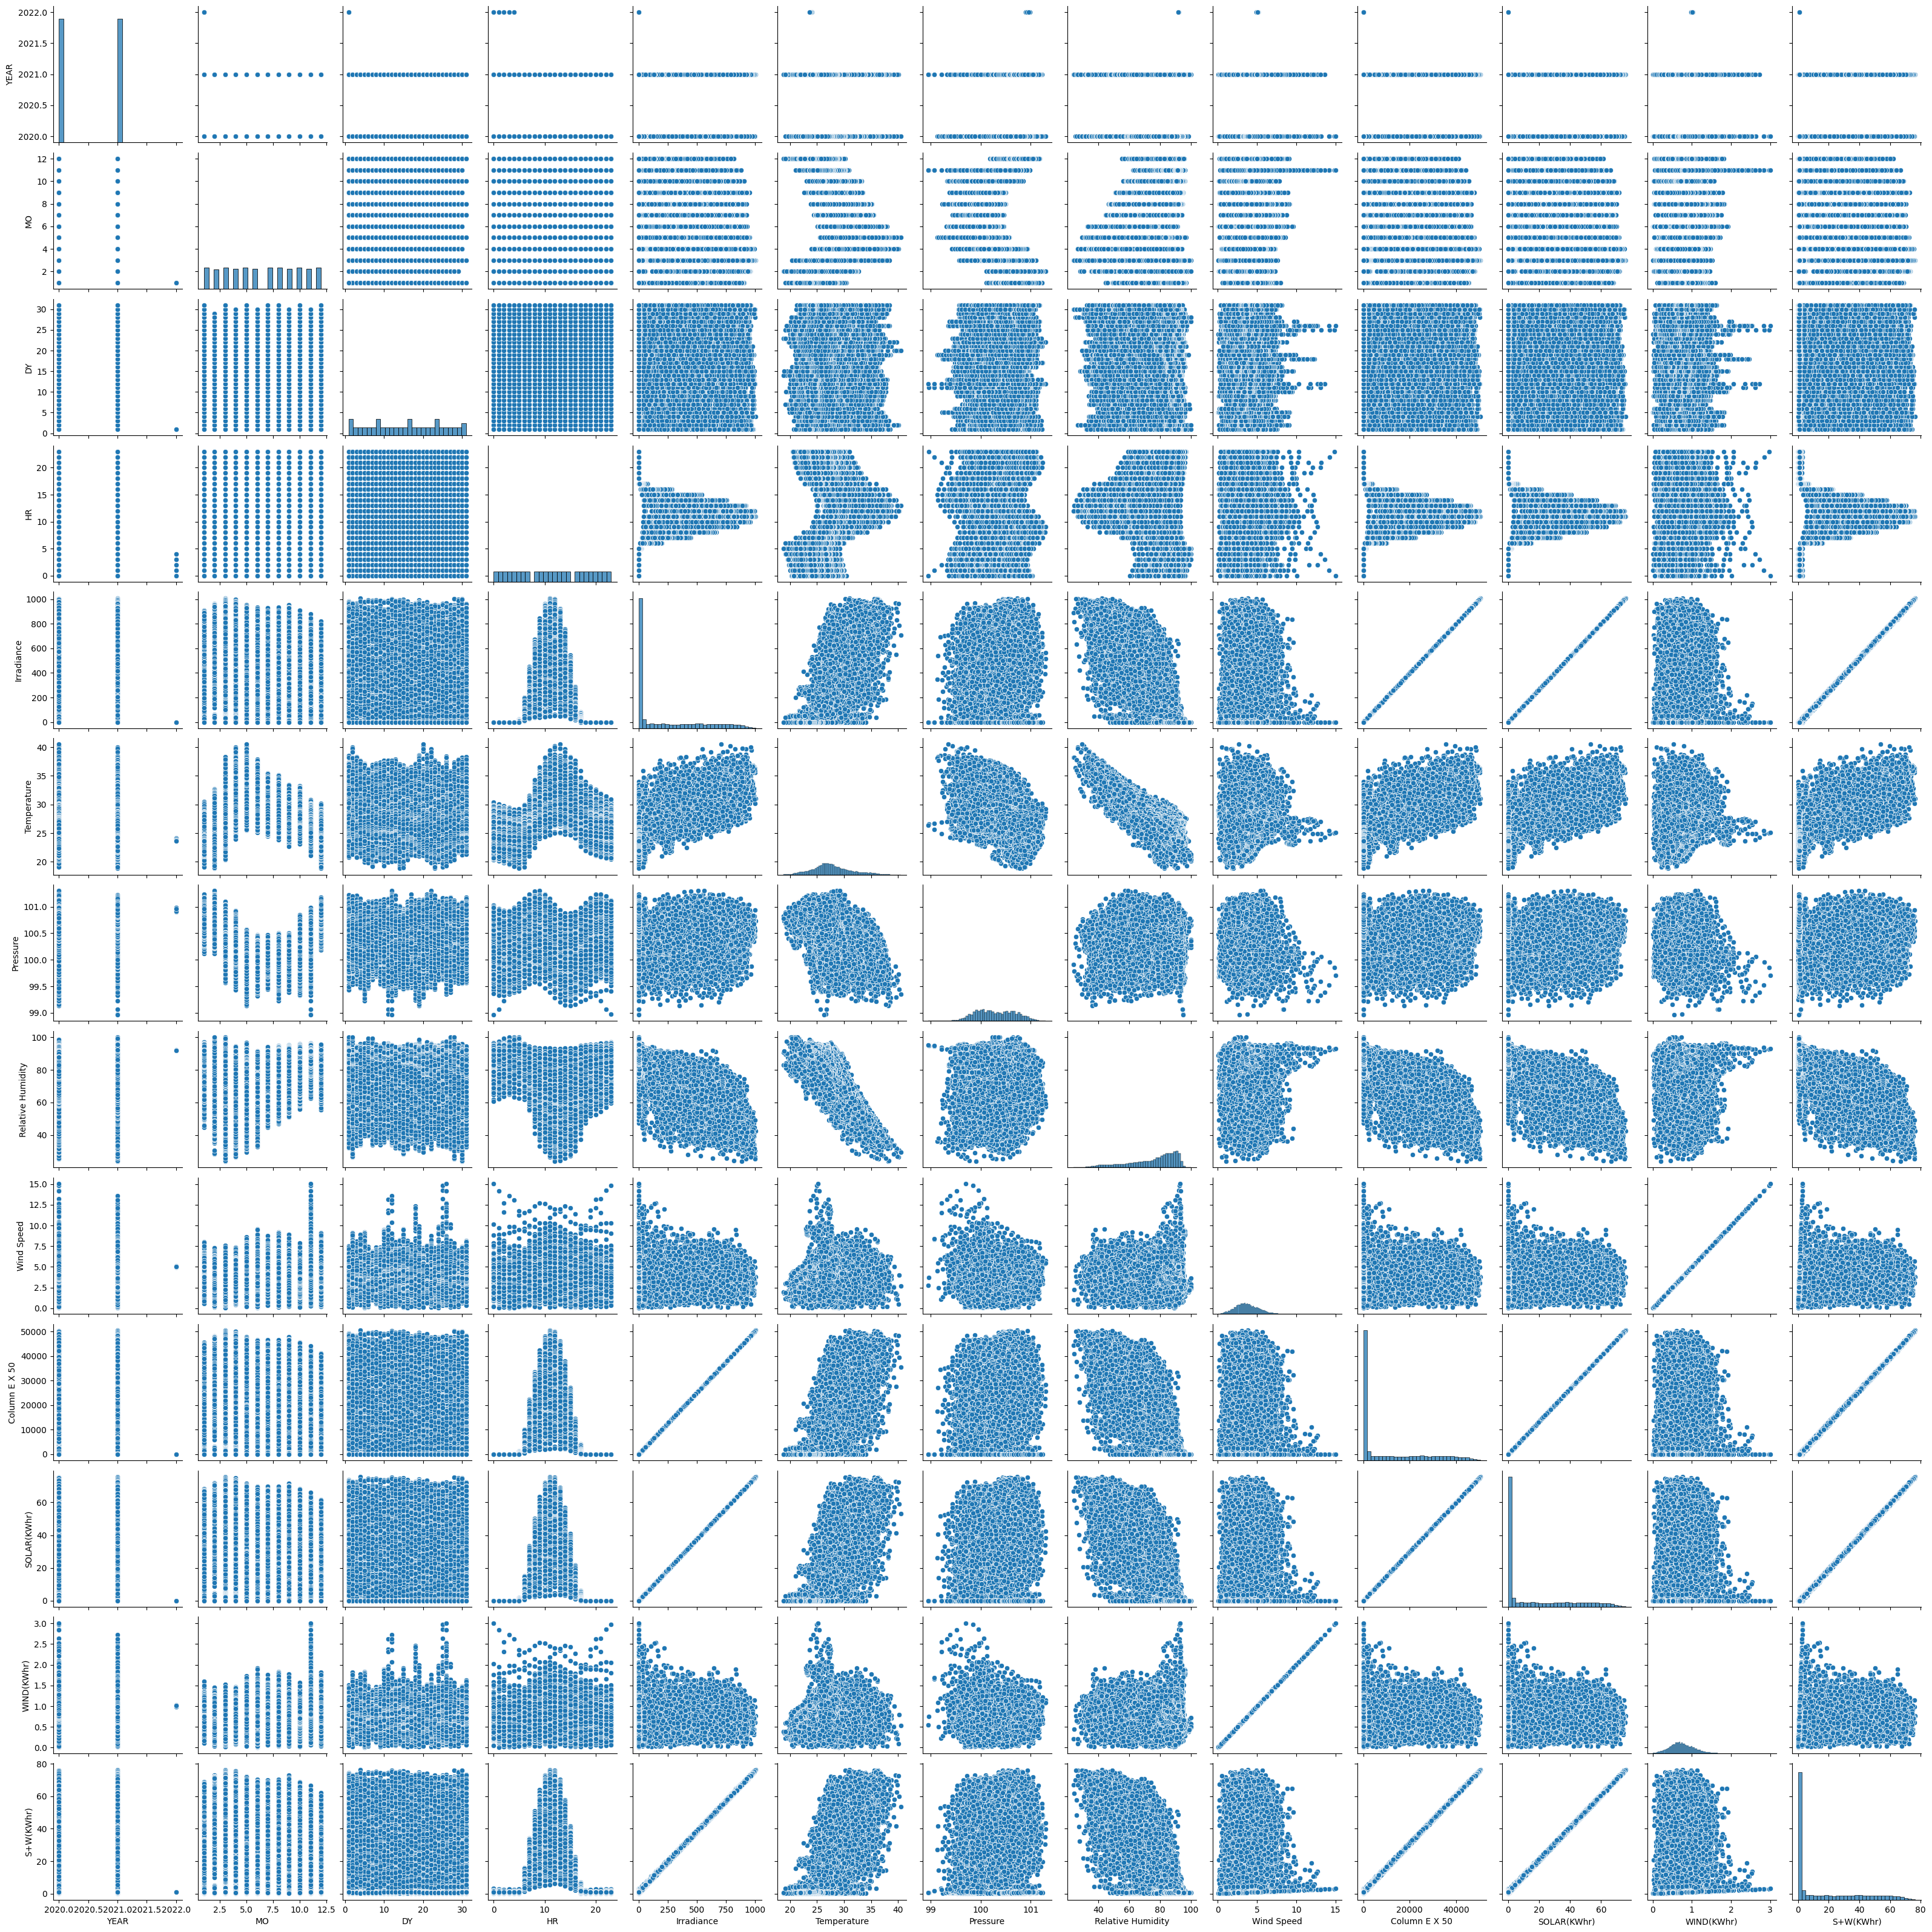

In [4]:
sns.pairplot(pvpower_df)

# STEP #3: CREATE TESTING AND TRAINING DATASET/DATA CLEANING

In [28]:
X = pvpower_df.drop(['Irradiance', 'Column E X 50', 'WIND(KWhr)','SOLAR(KWhr)','S+W(KWhr)','Relative Humidity','Wind Speed', 'HR'], axis = 1)

In [29]:
X

YEAR  MO  DY  Temperature  Pressure
0      2020   1   1        23.55    100.71
1      2020   1   1        24.35    100.83
2      2020   1   1        25.67    100.94
3      2020   1   1        26.72    101.02
4      2020   1   1        27.78    101.02
...     ...  ..  ..          ...       ...
17539  2022   1   1        24.12    100.99
17540  2022   1   1        24.00    100.94
17541  2022   1   1        23.83    100.90
17542  2022   1   1        23.71    100.92
17543  2022   1   1        23.62    100.96

[17544 rows x 5 columns]

In [30]:
y = pvpower_df['SOLAR(KWhr)']
y.shape

(17544,)

In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [32]:
scaler.data_max_

array([2022.  ,   12.  ,   31.  ,   40.48,  101.3 ])

In [33]:
scaler.data_min_

array([2.020e+03, 1.000e+00, 1.000e+00, 1.883e+01, 9.896e+01])

In [34]:
print(X_scaled[:,0])

[0. 0. 0. ... 1. 1. 1.]


In [35]:
y.shape

(17544,)

In [36]:
y = y.values.reshape(-1,1)

In [37]:
y.shape

(17544, 1)

In [38]:
y_scaled = scaler.fit_transform(y)


In [39]:
y_scaled

array([[0.        ],
       [0.0360206 ],
       [0.14061602],
       ...,
       [0.        ],
       [0.        ],
       [0.        ]])

# STEP#4: TRAINING THE MODEL

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)

In [41]:
import tensorflow.keras 
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

model = Sequential()
model.add(Dense(25, input_dim=5, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 25)                150       
                                                                 
 dense_4 (Dense)             (None, 25)                650       
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 826
Trainable params: 826
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [43]:
epochs_hist = model.fit(X_train, y_train, epochs=20, batch_size=25,  verbose=1, validation_split=0.2)


Epoch 1/20
422/422 [==============================] - 6s 3ms/step - loss: 0.0531 - val_loss: 0.0393
Epoch 2/20
422/422 [==============================] - 1s 2ms/step - loss: 0.0354 - val_loss: 0.0312
Epoch 3/20
422/422 [==============================] - 1s 2ms/step - loss: 0.0296 - val_loss: 0.0302
Epoch 4/20
422/422 [==============================] - 1s 2ms/step - loss: 0.0272 - val_loss: 0.0262
Epoch 5/20
422/422 [==============================] - 1s 2ms/step - loss: 0.0261 - val_loss: 0.0252
Epoch 6/20
422/422 [==============================] - 1s 2ms/step - loss: 0.0248 - val_loss: 0.0259
Epoch 7/20
422/422 [==============================] - 1s 2ms/step - loss: 0.0242 - val_loss: 0.0242
Epoch 8/20
422/422 [==============================] - 1s 2ms/step - loss: 0.0234 - val_loss: 0.0293
Epoch 9/20
422/422 [==============================] - 1s 2ms/step - loss: 0.0241 - val_loss: 0.0239
Epoch 10/20
422/422 [==============================] - 1s 2ms/step - loss: 0.0229 - val_loss: 0.0227

# STEP#5: EVALUATING THE MODEL 

In [44]:
print(epochs_hist.history.keys())


dict_keys(['loss', 'val_loss'])


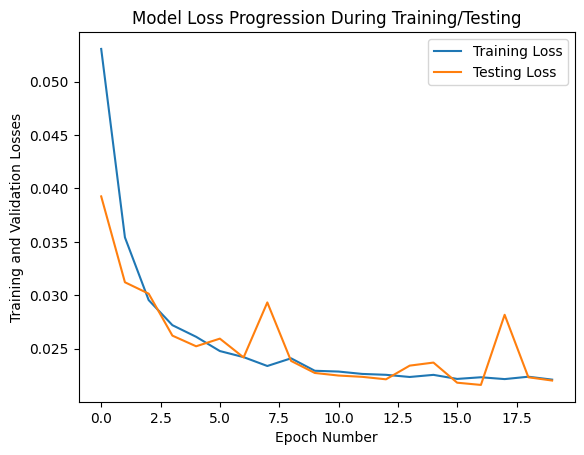

In [45]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Testing')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Testing Loss'])


In [46]:
# Gender, Age, Annual Salary, Credit Card Debt, Net Worth

X_Testing = np.array([[1, 50, 50000, 10985, 629312]])

In [47]:
y_predict = model.predict(X_Testing)
y_predict.shape

1/1 [==============================] - 0s 383ms/step


(1, 1)

In [48]:
print('Expected PowerGenerated=', y_predict[:,0])

Expected PowerGenerated= [977992.1]


# Thank You.